In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [33]:
data = pd.read_csv("pppub24.csv")
data

,PERIDNUM,PH_SEQ,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,OED_TYP3,PERRP,...,I_DISVL1,I_DISVL2,I_SURVL1,I_SURVL2,MIG_CBST,MIG_DSCP,DEP_STAT,FILEDATE,FILESTAT,YYYYMM
0,8301430212030651501101,6,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,71524,6,202403
1,8301430212030651501102,6,2,2,1,1,0,0,0,42,...,0,0,0,0,0,0,0,71524,6,202403
2,8301430212030651501103,6,3,3,2,2,0,0,0,53,...,0,0,0,0,0,0,0,71524,6,202403
3,4933808620900111501101,7,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,71524,1,202403
4,4933808620900111501102,7,2,2,1,1,0,0,0,42,...,0,0,0,0,0,0,0,71524,1,202403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144260,1600950111239141711101,89473,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,71524,1,202403
144261,1600950111239141711102,89473,2,2,1,1,0,0,0,42,...,0,0,0,0,0,0,0,71524,1,202403
144262,1600950111239141711103,89473,3,3,1,1,0,0,0,48,...,0,0,0,0,0,0,1,71524,6,202403
144263,1600950111239141711104,89473,4,4,1,1,0,0,0,48,...,0,0,0,0,0,0,1,71524,6,202403


In [ ]:
data['PTOT_R']
#PTOT_R

0          4
1         10
2          1
3          5
4         17
          ..
144260    33
144261    21
144262     0
144263     0
144264     0
Name: PTOT_R, Length: 144265, dtype: int64

In [5]:
print(data.isnull().sum())

#Filling missing data with median
#data.fillna(data.median(numeric_only=True), inplace=True)


Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64


In [29]:

binary_cols = ['Marital_Status', 'Homeownership_Status']
for col in binary_cols:
    data[col] = data[col].map({'Married': 1, 'Single': 0, 'Own': 1, 'Rent': 0})

categorical_cols = ['Education_Level', 'Occupation', 'Location', 'Employment_Status', 'Type_of_Housing', 'Gender', 'Primary_Mode_of_Transportation']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
num_cols = ['Age', 'Work_Experience', 'Number_of_Dependents', 'Household_Size', 'Income']
data[num_cols] = scaler.fit_transform(data[num_cols])

data.head()

,Age,Number_of_Dependents,Work_Experience,Marital_Status,Household_Size,Homeownership_Status,Income,Education_Level_Doctorate,Education_Level_High School,Education_Level_Master's,...,Location_Suburban,Location_Urban,Employment_Status_Part-time,Employment_Status_Self-employed,Type_of_Housing_Single-family home,Type_of_Housing_Townhouse,Gender_Male,Primary_Mode_of_Transportation_Car,Primary_Mode_of_Transportation_Public transit,Primary_Mode_of_Transportation_Walking
0,0.787878,1.442904,-0.263365,1.0,1.497416,1,-0.408747,False,False,True,...,False,True,False,False,False,False,True,False,True,False
1,1.642959,-1.474411,-1.423625,0.0,1.497416,1,-0.407126,False,True,False,...,False,True,False,False,False,False,True,False,False,False
2,0.130124,-0.890948,-1.628377,0.0,1.497416,1,-0.409166,False,False,False,...,False,True,False,False,True,False,False,True,False,False
3,-0.790733,-0.307485,0.487391,1.0,-1.487070,1,-0.407644,False,True,False,...,False,True,False,False,False,False,False,True,False,False
4,1.050980,0.275978,-0.672869,1.0,0.005173,1,-0.096995,False,False,False,...,False,True,False,True,False,True,True,False,False,True


In [25]:
X = data.drop(columns=['Income'])
y = data['Income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

print({X_train.shape}, {X_test.shape})

{(8000, 23)} {(2000, 23)}


In [26]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.005, max_depth=8, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(mae)
print(rmse)
print(r2)
print(mse)

1098425.375
1838609.7509585877
0.052751362323760986
3380485816320.0


In [21]:
param_grid = {
    'n_estimators' : [50, 100, 200, 300, 400, 500, 250],
    'max_depth': [3,6,10,5,7,8,4],
    'learning_rate' : [0.01, 0.1, 0.2, 0.001, 0.005]
}

grid_search = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(mae_best)
print(rmse_best)
print(r2_best)
print(mse_best)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits
Best Params: {'learning_rate': 0.005, 'max_depth': 8, 'n_estimators': 200}
0.5986515956478524
0.9632942009945803
0.024658824703019167
0.9279357176697869


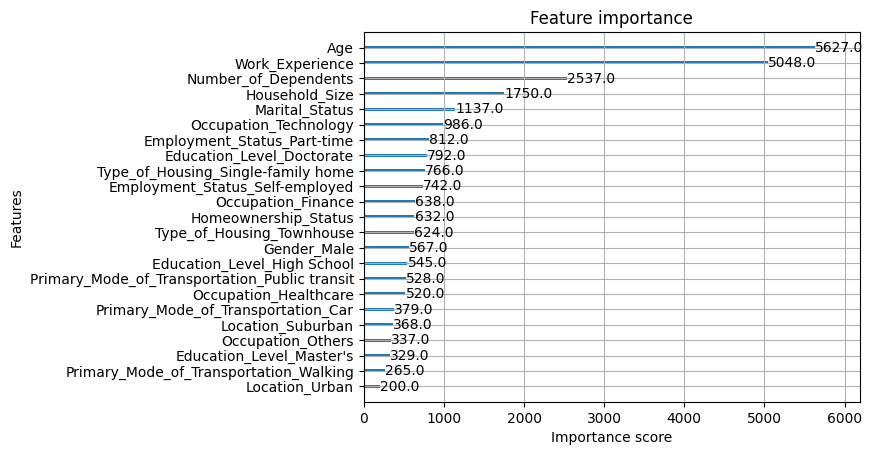

In [11]:
xgb.plot_importance(xgb_model)
plt.show()